# **Medical Cost Personal Datasets**

**Columns**

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

In [2]:
#Load the dataset
dataset <- read.csv("/content/insurance.csv")

# **PREPROCESSING THE GIVEN DATASET**

In [6]:
head(dataset)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [7]:
#structure of the dataset
str(dataset)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [8]:
#summary of the dataset
summary(dataset)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9380  
                                       Mean   : 9871  
                                       3rd Qu.:12269  
                                       Max.   :34473  

In [9]:
#Columns of the dataset
column_name <- as.vector(names(dataset))
column_name
dim(dataset)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

[1] 1338    7

In [17]:
#check for null values
colSums(is.na(dataset))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

There is no null values int the dataset

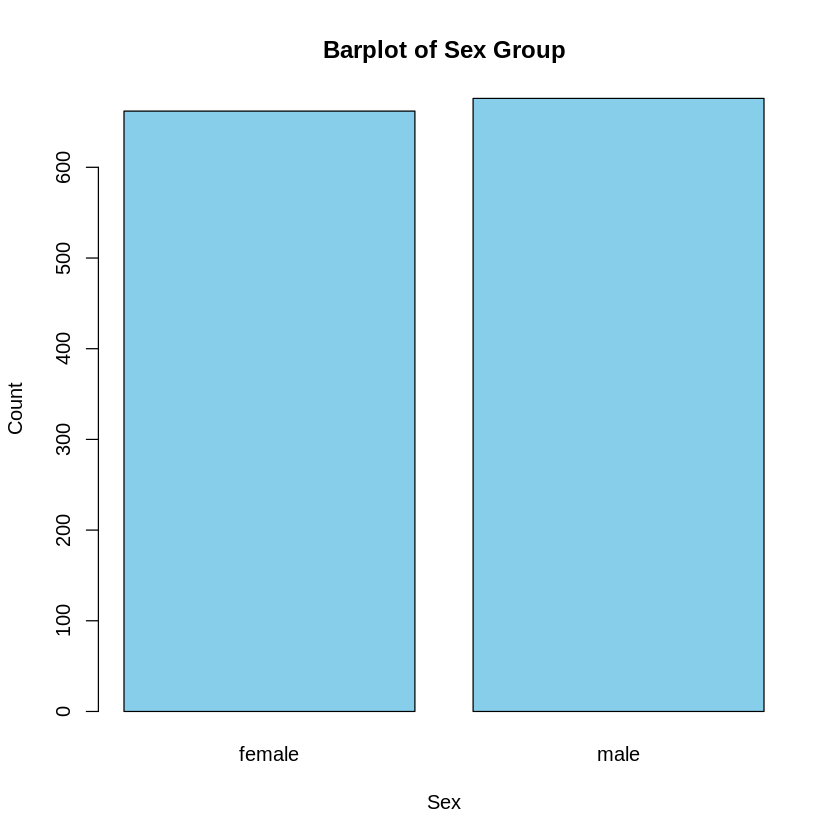

In [21]:
#create a barplot of sex
barplot(table(dataset$sex),
        main = "Barplot of Sex Group",
        xlab = "Sex",
        ylab = "Count",
        col = "skyblue")


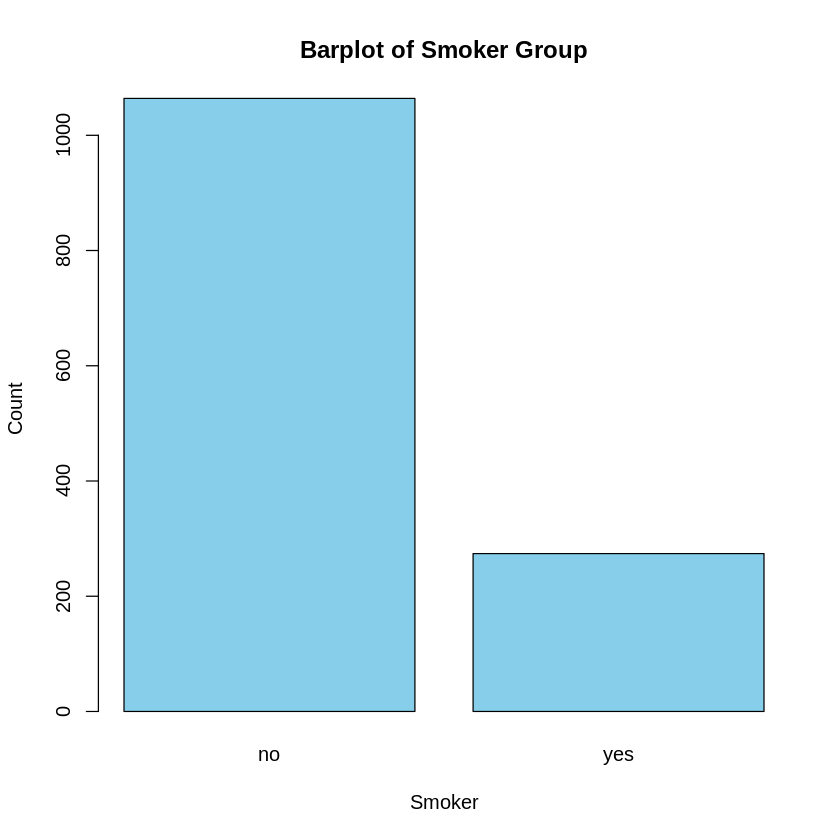

In [22]:
#create a barplot of smoker
barplot(table(dataset$smoker),
        main = "Barplot of Smoker Group",
        xlab = "Smoker",
        ylab = "Count",
        col = "skyblue")


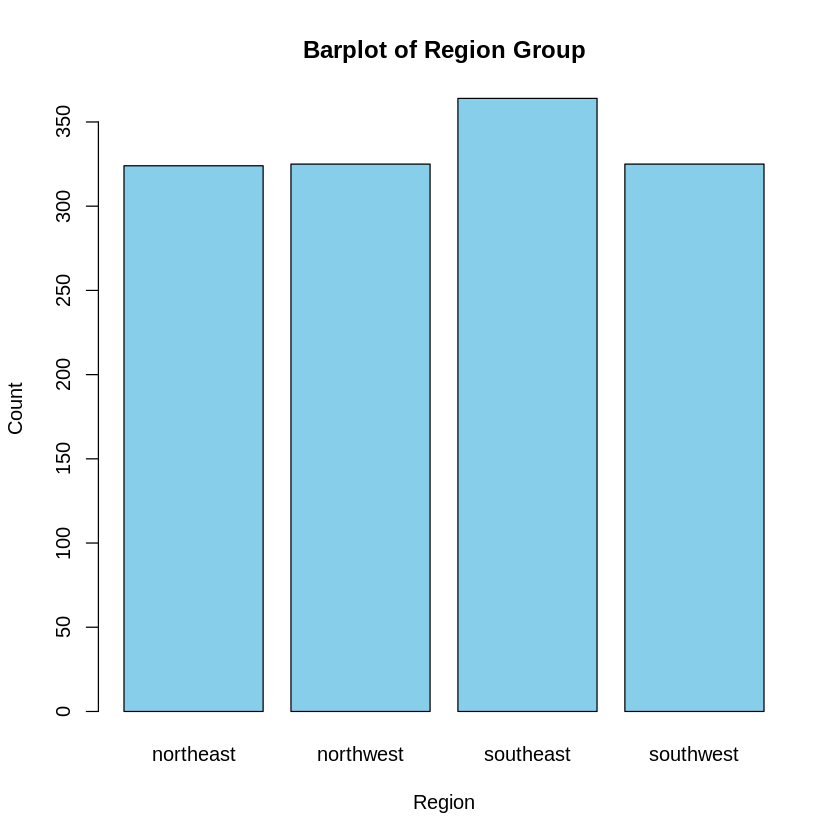

In [23]:
#create a barplot of region
barplot(table(dataset$region),
        main = "Barplot of Region Group",
        xlab = "Region",
        ylab = "Count",
        col = "skyblue")


In [26]:
#ONE HOT ENCODING
# Create a copy of the original data frame
encoded_data <- data

#                                 SEX
# Define the mapping of categories to numerical values
mapping <- c("male" = 0, "female" = 1)
# Apply the ordinal encoding
encoded_data$sex <- mapping[as.character(encoded_data$sex)]

#                                 SMOKER
# Define the mapping of categories to numerical values
mapping <- c("no" = 0, "yes" = 1)
# Apply the ordinal encoding
encoded_data$smoker <- mapping[as.character(encoded_data$smoker)]


#                                 REGION
# Define the mapping of categories to numerical values
mapping <- c("southwest" = 0, "southeast" = 1, "northwest"=2, "northeast"=3)
# Apply the ordinal encoding
encoded_data$region <- mapping[as.character(encoded_data$region)]
# Print the first few rows of the encoded data frame
head(encoded_data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,19,1,27.900,0,1,0,16884.924
2,18,0,33.770,1,0,1,1725.552
3,28,0,33.000,3,0,1,4449.462
4,33,0,22.705,0,0,2,21984.471
5,32,0,28.880,0,0,2,3866.855
6,31,1,25.740,0,0,1,3756.622


# **BOX PLOT ANALYSIS**

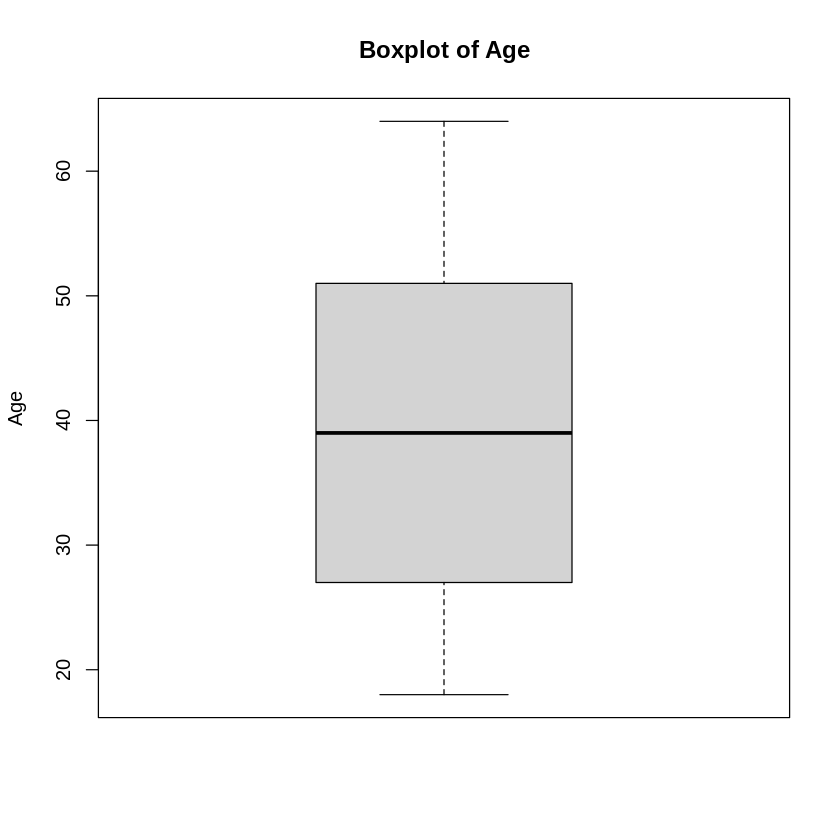

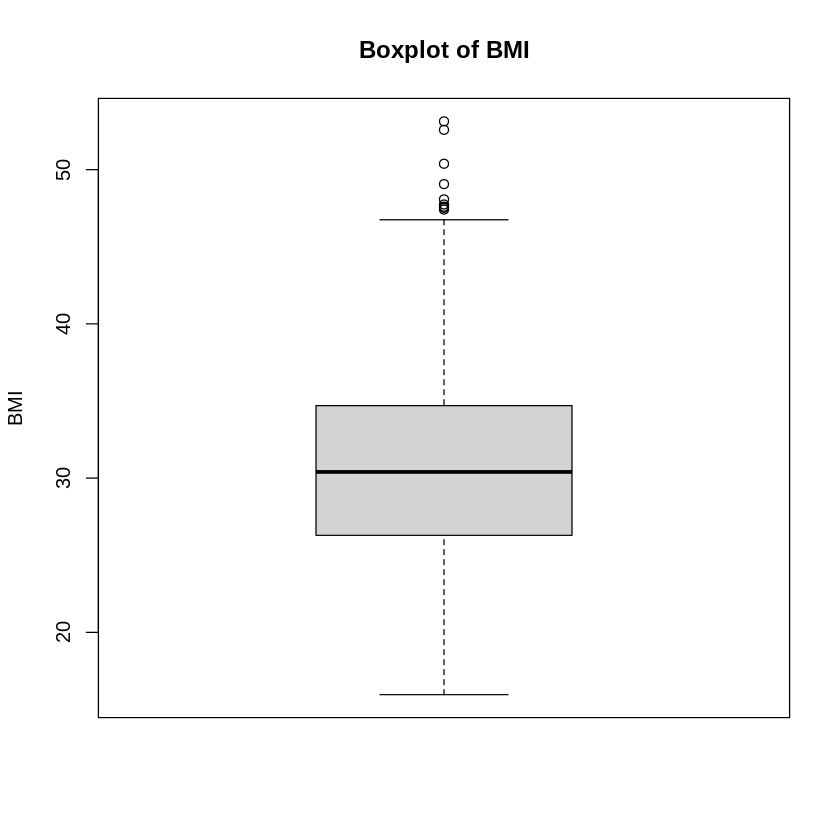

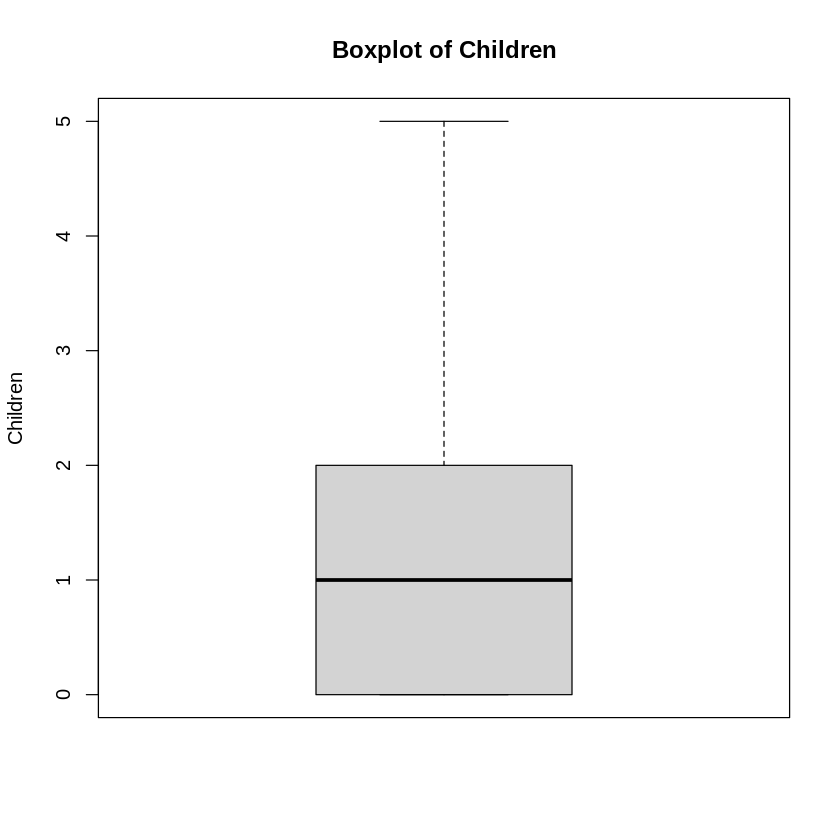

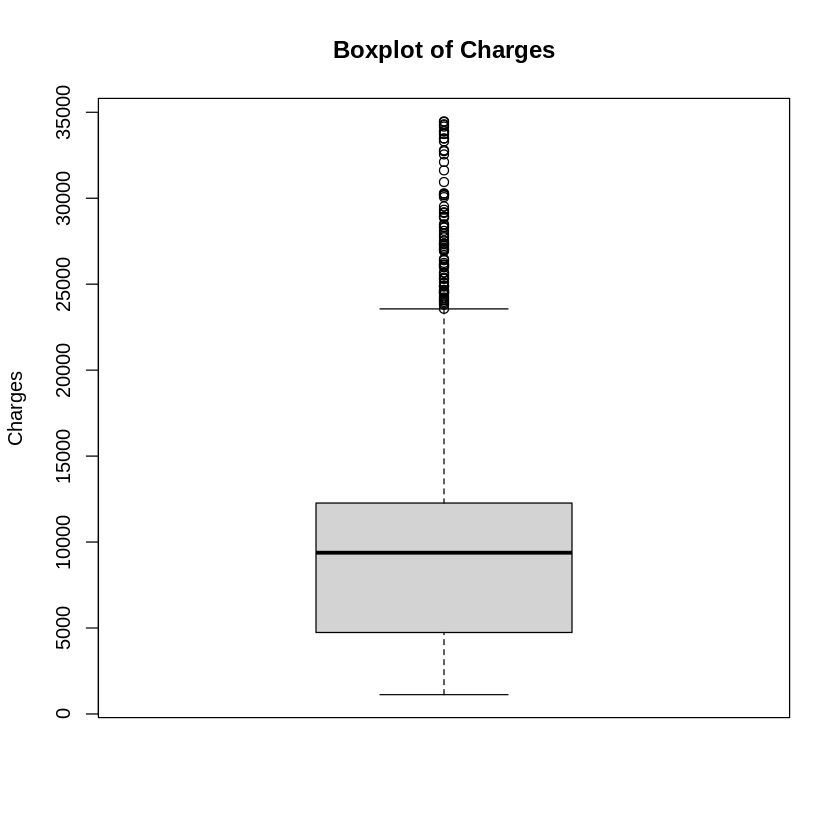

In [28]:
# Create boxplots for each numerical variable
boxplot(dataset$age,
        main = "Boxplot of Age",
        ylab = "Age")

boxplot(dataset$bmi,
        main = "Boxplot of BMI",
        ylab = "BMI")

boxplot(dataset$children,
        main = "Boxplot of Children",
        ylab = "Children")

boxplot(dataset$charges,
        main = "Boxplot of Charges",
        ylab = "Charges")

**OBSERVATION**

During the boxplot analysis of the dataset, it was observed that 'BMI' and 'Charges' exhibit outliers, with individuals displaying notably high or low values compared to the majority of the data.

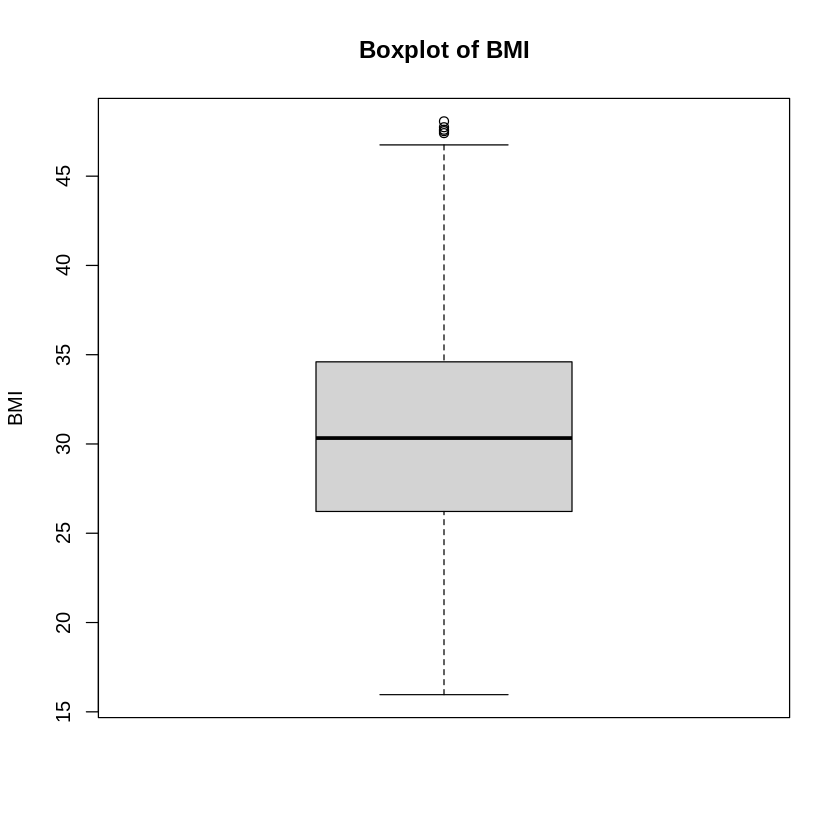

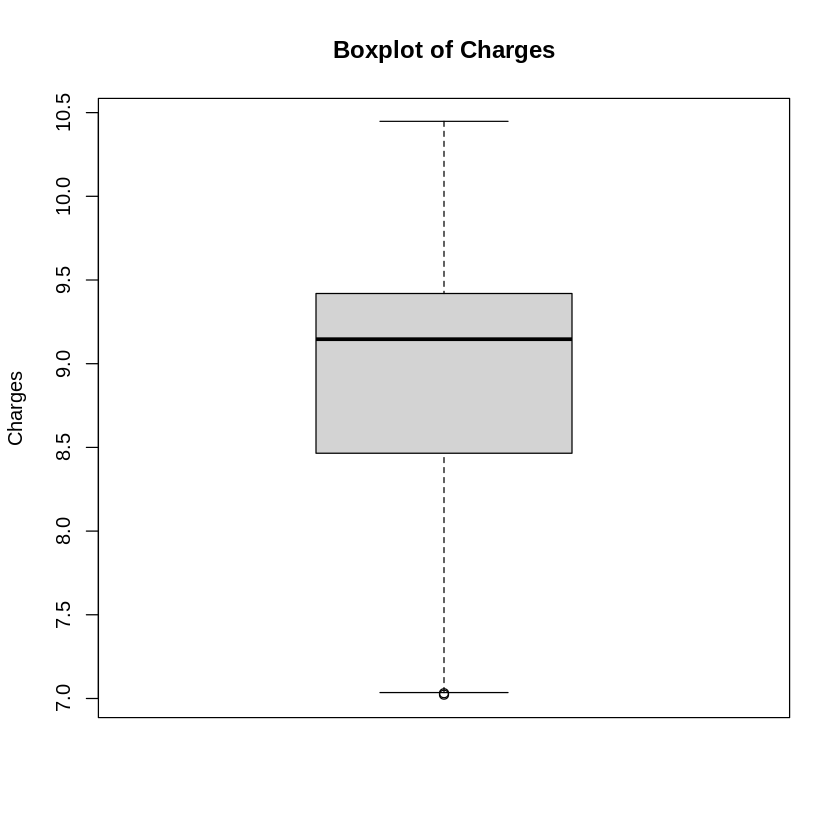

In [32]:
#Transformation:
#Apply mathematical transformations to the data to reduce the impact of outliers.
# Log transformation of 'Charges'
dataset$log_charges <- log(dataset$charges)

#removing outliers
# Calculate Z-scores for 'BMI'
z_scores <- scale(dataset$bmi)

# Define threshold for outliers (e.g., Z-score > 3)
outliers <- which(abs(z_scores) > 3)

# Remove outliers from 'BMI'
clean_dataset <- dataset[-outliers, ]

boxplot(clean_dataset$bmi,
        main = "Boxplot of BMI",
        ylab = "BMI")

boxplot(clean_dataset$log_charges,
        main = "Boxplot of Charges",
        ylab = "Charges")


# **CORRELATION ANALYSIS**

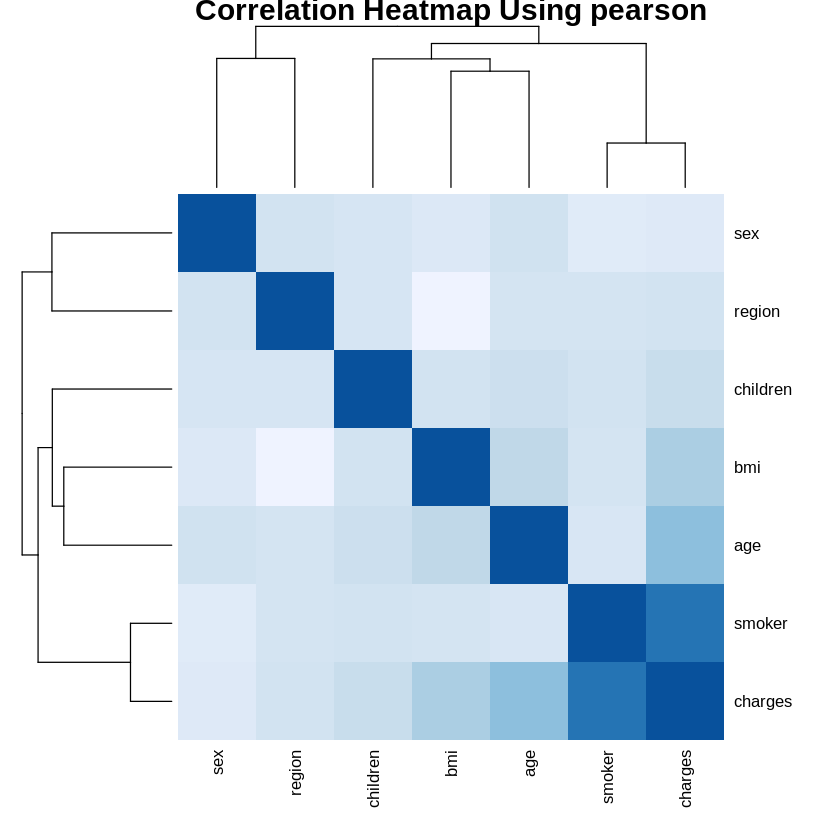

In [33]:
#PEARSON CORRELATION

correlation_matrix <- cor(encoded_data, method = "pearson")
heatmap(correlation_matrix,
        col = colorRampPalette(c("#EFF3FF", "#BDD7E7", "#6BAED6", "#3182BD", "#08519C"))(100),
        scale = "none",
        symm = TRUE,
        main = "Correlation Heatmap Using pearson",
        cex.axis = 0.8,
        cex.lab = 0.8,
        cexRow = 1,
        cexCol = 1)

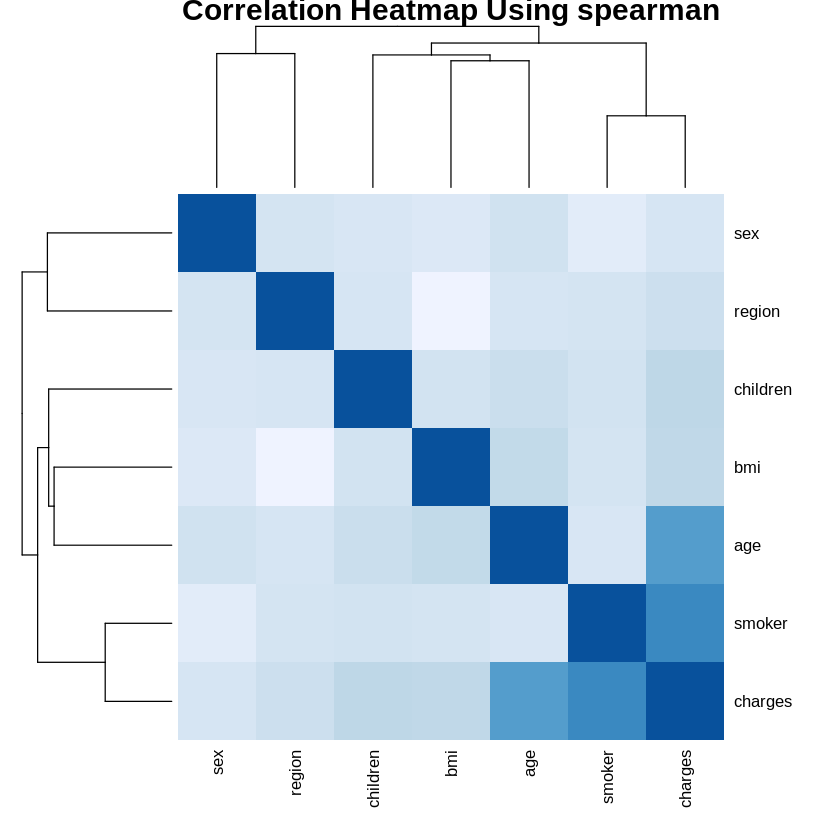

In [35]:
#SPEARMAN CORRELATION

correlation_matrix <- cor(encoded_data, method = "spearman")
heatmap(correlation_matrix,
        col = colorRampPalette(c("#EFF3FF", "#BDD7E7", "#6BAED6", "#3182BD", "#08519C"))(100),
        scale = "none",
        symm = TRUE,
        main = "Correlation Heatmap Using spearman",
        cex.axis = 0.8,
        cex.lab = 0.8,
        cexRow = 1,
        cexCol = 1)

# **TREND ANALYSIS THROUGH REGRESSION MODEL**


Call:
lm(formula = charges ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5271.7 -1527.3  -675.4   843.8 11633.9 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -70550.679   1186.946 -59.439  < 2e-16 ***
age               -107.405      6.903 -15.560  < 2e-16 ***
sexmale            339.191    141.039   2.405  0.01631 *  
bmi                -48.305     12.093  -3.995 6.84e-05 ***
children          -582.194     59.674  -9.756  < 2e-16 ***
smokeryes         -249.227    210.008  -1.187  0.23554    
regionnorthwest    360.755    200.815   1.796  0.07265 .  
regionsoutheast    581.751    202.816   2.868  0.00419 ** 
regionsouthwest    146.354    202.459   0.723  0.46988    
log_charges       9654.987    143.789  67.147  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2554 on 1328 degrees of freedom
Multiple R-squared:  0.8621,	Adjusted R-squared:  0.8612 
F-statisti

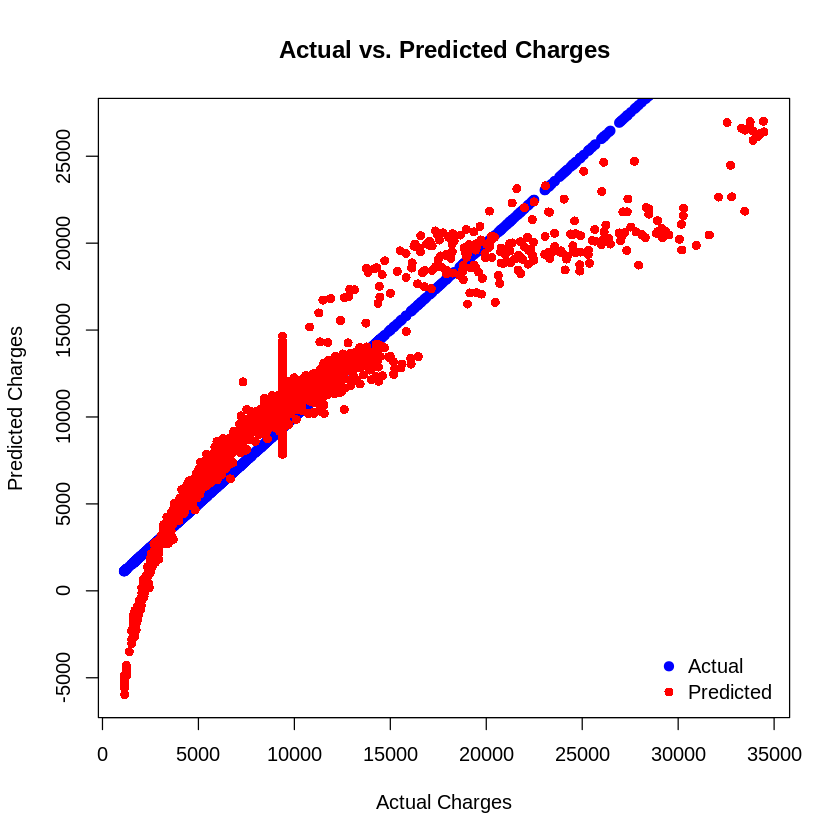

In [40]:
dataset$sex <- as.factor(dataset$sex)
dataset$smoker <- as.factor(dataset$smoker)
dataset$region <- as.factor(dataset$region)

# Fit a linear regression model
lm_model <- lm(charges ~ ., data = dataset)

# Create a new plot with labels for actual and predicted values
plot(x = dataset$charges, y = dataset$charges,
     main = "Actual vs. Predicted Charges",
     xlab = "Actual Charges", ylab = "Predicted Charges",
     col = "blue", pch = 19,
     xlim = range(dataset$charges), ylim = range(predict(lm_model)))

# Add points for predicted values with a different color and smaller size
points(x = dataset$charges, y = predict(lm_model),
       col = "red", pch = 16)

# Add a legend with a more informative position
legend("bottomright", legend = c("Actual", "Predicted"),
       col = c("blue", "red"), pch = c(19, 16), bty = "n")

# Summary of the regression model
summary(lm_model)

# **PREDICTIVE ANALYSIS**

In [ ]:
install.packages("caret")
install.packages("e1071")

In [60]:
# Load required libraries
library(caret)  # For machine learning modeling and evaluation
library(e1071)  # For Support Vector Machine modeling

# Read the dataset
insurance_data <- read.csv("/content/insurance.csv")

# Define predictors and target variable
X <- insurance_data[, c("age", "bmi", "children", "sex", "smoker", "region")]
y <- insurance_data$charges  # Use "charges" as the target variable

# Split the data into training and testing sets (70% training, 30% testing)
set.seed(123)  # For reproducibility
train_index <- createDataPartition(y, p = 0.7, list = FALSE)
train_data <- insurance_data[train_index, ]
test_data <- insurance_data[-train_index, ]

# Train logistic regression model
logit_model <- glm(charges ~ ., data = train_data)

# Train Support Vector Machine model
svm_model <- svm(charges ~ ., data = train_data)

# Predict on the test set for logistic regression
logit_predictions <- predict(logit_model, newdata = test_data)

# Predict on the test set for SVM
svm_predictions <- predict(svm_model, newdata = test_data)

# Compute accuracy of logistic regression model
logit_accuracy <- cor(logit_predictions, test_data$charges)
print(paste("Correlation of Logistic Regression model predictions with actual charges:", logit_accuracy))

# Compute accuracy of SVM model
svm_accuracy <- cor(svm_predictions, test_data$charges)
print(paste("Correlation of SVM model predictions with actual charges:", svm_accuracy))


[1] "Correlation of Logistic Regression model predictions with actual charges: 0.852695252874857"
[1] "Correlation of SVM model predictions with actual charges: 0.903657085488599"


# **PRESCRIPTIVE ANALYSIS ON SALES DATA**

**Online Retail II UCI**
Content
Attribute Information:

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).

**CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

In [65]:
dataset<-read.csv("/content/online_retail_II.csv")
head(dataset, 5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


**OBJECTIVE:**

Identify the top-selling products and countries to optimize inventory management and marketing strategies.

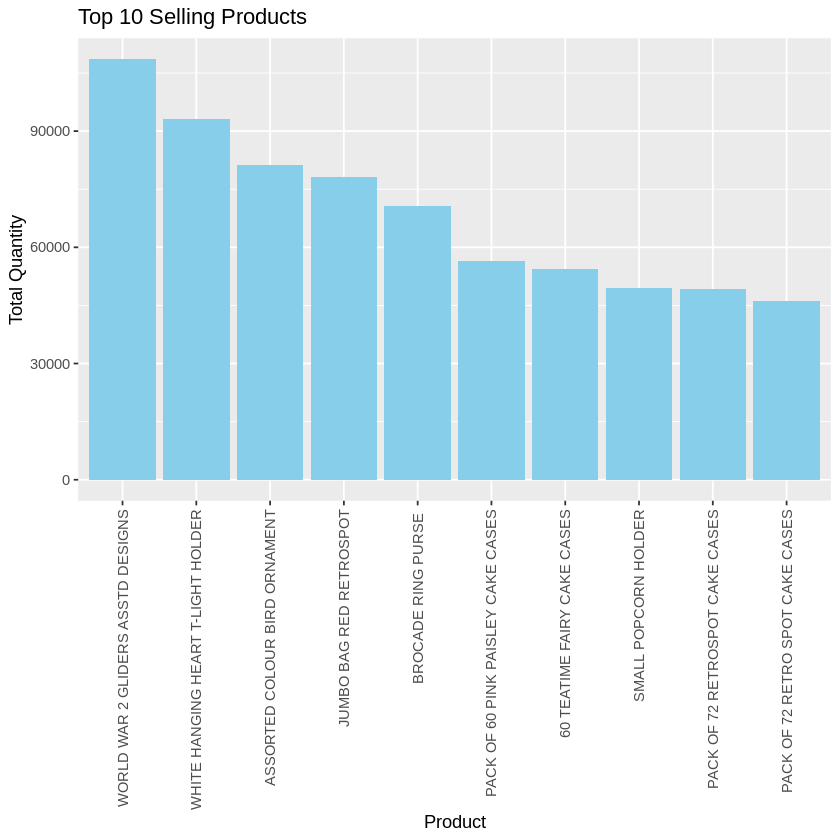

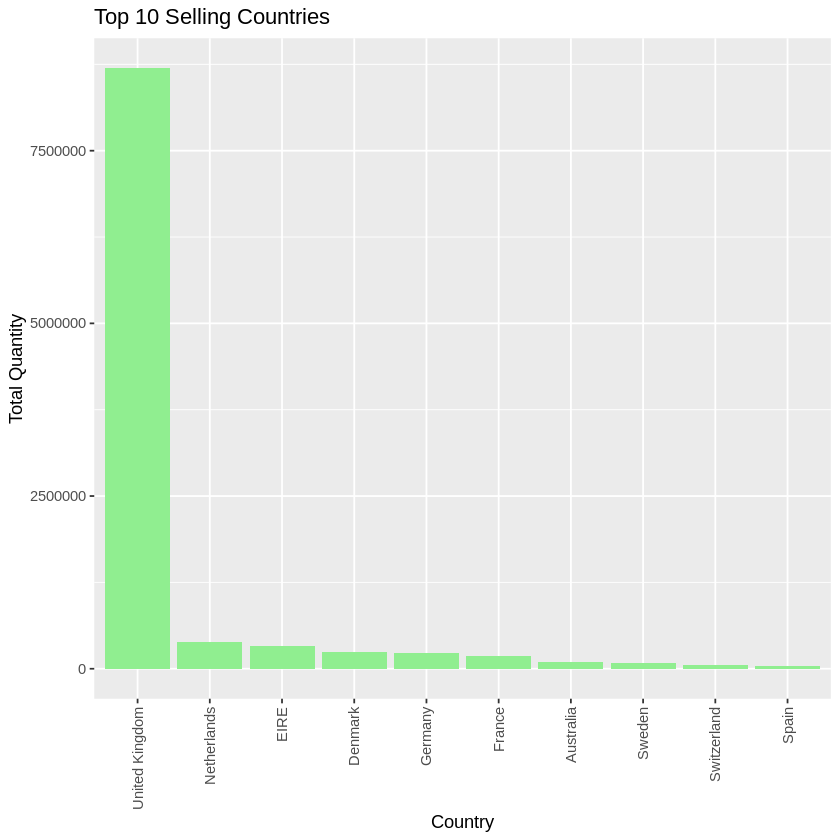

In [70]:
# Load required libraries
library(dplyr)   # For data manipulation
library(ggplot2) # For data visualization

# Read the dataset
dataset <- read.csv("/content/online_retail_II.csv")

# Objective 1: Identify the top-selling products
top_products <- dataset %>%
  group_by(Description) %>%
  summarise(Total_Quantity = sum(Quantity)) %>%
  top_n(10, Total_Quantity)

# Visualize top-selling products
ggplot(top_products, aes(x = reorder(Description, -Total_Quantity), y = Total_Quantity)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 10 Selling Products", x = "Product", y = "Total Quantity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

# Objective 2: Identify the top-selling countries
top_countries <- dataset %>%
  group_by(Country) %>%
  summarise(Total_Quantity = sum(Quantity)) %>%
  top_n(10, Total_Quantity)

# Visualize top-selling countries
ggplot(top_countries, aes(x = reorder(Country, -Total_Quantity), y = Total_Quantity)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Top 10 Selling Countries", x = "Country", y = "Total Quantity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
